[*********************100%%**********************]  1 of 1 completed


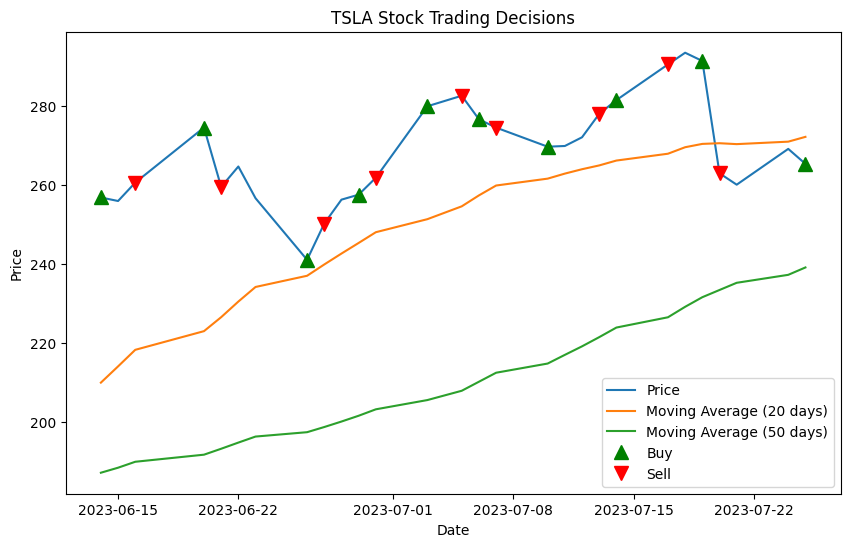

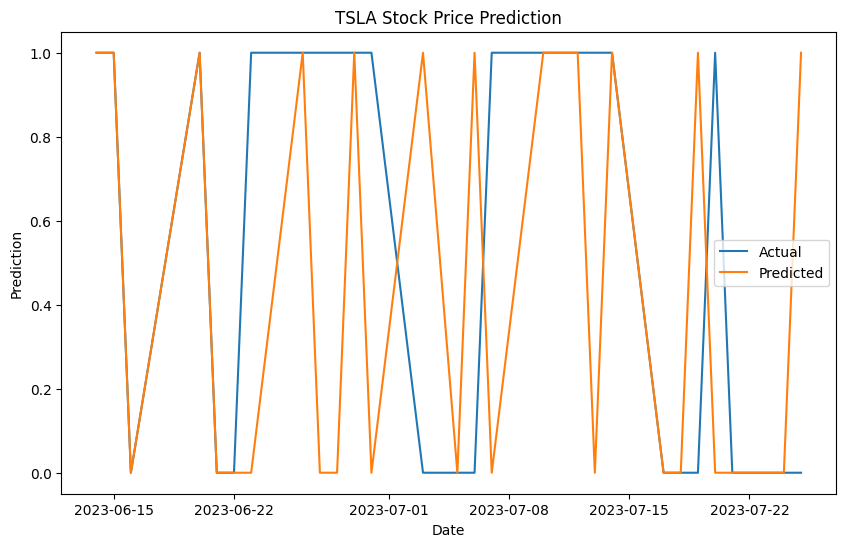

In [11]:
import yfinance as yf
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

stock_symbol = "BTC-AUD"
start_date = "2023-01-01"
end_date = "2023-07-27"


data = yf.download(ticker, start=start_date, end=end_date)


data['Return'] = data['Close'].pct_change().shift(-1)


data.dropna(inplace=True)


X = np.array(data['Return']).reshape(-1, 1)
y = np.where(data['Return'].shift(-1) > 0, 1, 0)


split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = DecisionTreeClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


buy_dates = []
sell_dates = []
buy_prices = []
sell_prices = []
shares = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        if shares == 0:
            buy_dates.append(data.index[i+split])
            buy_prices.append(data['Close'][i+split])
        shares += 21000 / data['Close'][i+split]
    else:
        if shares > 0:
            sell_dates.append(data.index[i+split])
            sell_prices.append(data['Close'][i+split])
        shares = 0


plt.figure(figsize=(10, 6))
plt.plot(data.index[split:], data['Close'][split:], label='Price')
rolling_mean = data['Close'].rolling(window=20).mean()
plt.plot(data.index[split:], rolling_mean[split:], label='Moving Average (20 days)')
rolling_mean = data['Close'].rolling(window=50).mean()
plt.plot(data.index[split:], rolling_mean[split:], label='Moving Average (50 days)')
plt.plot(buy_dates, buy_prices, 'g^', markersize=10, label='Buy')
plt.plot(sell_dates, sell_prices, 'rv', markersize=10, label='Sell')
plt.legend()
plt.title(f"{ticker} Stock Trading Decisions")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(data.index[split:], y_test, label='Actual')
plt.plot(data.index[split:], y_pred, label='Predicted')
plt.legend()
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Prediction")
plt.show()

